In [1]:
import pandas as pd
import numpy as np
import pandas_datareader as web
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
yf.pdr_override()

In [139]:
start = pd.to_datetime('2011-01-01')
end = pd.to_datetime('2018-12-31')

In [140]:
tatamotors = web.data.get_data_yahoo('TATAMOTORS.NS', start = start, end = end)
tcs = web.data.get_data_yahoo('TCS.NS', start = start, end = end)
wipro = web.data.get_data_yahoo('WIPRO.NS', start = start, end = end)
ibrealest = web.data.get_data_yahoo('IBREALEST.NS', start = start, end = end)
ongc = web.data.get_data_yahoo('ONGC.NS', start = start, end = end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [142]:
tatamotors = tatamotors[['Adj Close']]
tcs = tcs[['Adj Close']]
wipro = wipro[['Adj Close']]
ibrealest = ibrealest[['Adj Close']]
ongc = ongc[['Adj Close']]

In [143]:
# Let's find the best portfolio for these shares

In [144]:
# By Monte Carlo Simulations

In [145]:
stocks = pd.concat([tatamotors, tcs, wipro, ibrealest, ongc], axis = 1)
stocks.columns = ['tatamotors', 'tcs', 'wipro', 'ibrealest', 'ongc']

In [146]:
stocks

,tatamotors,tcs,wipro,ibrealest,ongc
Date,,,,,
2011-01-03,246.476410,471.944580,162.032684,110.406303,148.033310
2011-01-04,244.583252,466.524323,162.569366,107.314919,147.374939
2011-01-05,241.644638,472.311340,162.904800,106.632408,144.981720
2011-01-06,237.538101,477.507416,163.139618,103.099403,140.533157
2011-01-07,224.201340,465.668610,159.986496,100.369362,138.077026
...,...,...,...,...,...
2018-12-21,176.250000,1785.016479,239.388031,91.050003,129.452393
2018-12-24,172.500000,1806.390015,242.806793,88.400002,128.929337
2018-12-26,170.899994,1778.802368,242.398041,88.949997,127.796089


In [147]:
# Mean Daily Return

stocks.pct_change(1).mean()

tatamotors    0.000082
tcs           0.000801
wipro         0.000329
ibrealest     0.000539
ongc          0.000113
dtype: float64

In [148]:
stocks.pct_change(1).corr()

,tatamotors,tcs,wipro,ibrealest,ongc
tatamotors,1.000000,0.202265,0.192458,0.335644,0.303060
tcs,0.202265,1.000000,0.427654,0.120702,0.077866
wipro,0.192458,0.427654,1.000000,0.114095,0.096170
ibrealest,0.335644,0.120702,0.114095,1.000000,0.262007
ongc,0.303060,0.077866,0.096170,0.262007,1.000000


In [149]:
# Arithmetic Returns 
stocks.pct_change(1).head()

,tatamotors,tcs,wipro,ibrealest,ongc
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.007681,-0.011485,0.003312,-0.028000,-0.004447
2011-01-05,-0.012015,0.012405,0.002063,-0.006360,-0.016239
2011-01-06,-0.016994,0.011001,0.001441,-0.033133,-0.030684
2011-01-07,-0.056146,-0.024793,-0.019328,-0.026480,-0.017477


In [150]:
# Log Returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,tatamotors,tcs,wipro,ibrealest,ongc
Date,,,,,
2011-01-03,NaN,NaN,NaN,NaN,NaN
2011-01-04,-0.007711,-0.011551,0.003307,-0.028400,-0.004457
2011-01-05,-0.012088,0.012328,0.002061,-0.006380,-0.016372
2011-01-06,-0.017140,0.010941,0.001440,-0.033694,-0.031164
2011-01-07,-0.057784,-0.025105,-0.019517,-0.026837,-0.017632


In [151]:
# Check that here both Arithmetic and Log returns are very similar

f:\python\lib\site-packages\pandas\plotting\_matplotlib\tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


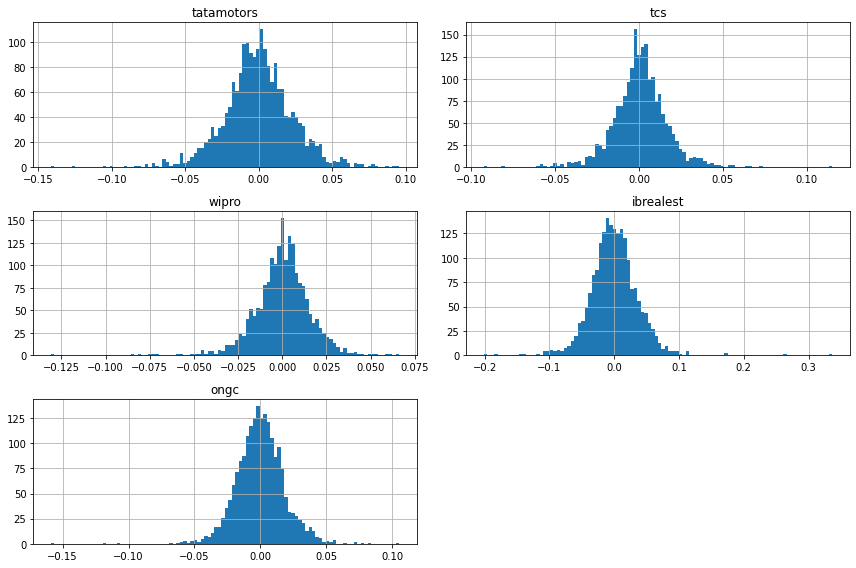

In [152]:
log_ret.hist(bins=100, figsize=(12,8))
plt.tight_layout()

In [153]:
log_ret.cov() * 252 

,tatamotors,tcs,wipro,ibrealest,ongc
tatamotors,0.135653,0.018688,0.017191,0.072420,0.033193
tcs,0.018688,0.062555,0.026003,0.017952,0.005789
wipro,0.017191,0.026003,0.059682,0.016602,0.007039
ibrealest,0.072420,0.017952,0.016602,0.329777,0.045831
ongc,0.033193,0.005789,0.007039,0.045831,0.087931


In [154]:

num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(stocks.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

for ind in range(num_portfolios):

    weights = np.array(np.random.random(5))
    weights = weights/np.sum(weights)
    
    all_weights[ind,:] = weights
    
    ret_arr[ind] = np.sum(log_ret.mean()*weights*252)
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]


In [155]:
sharpe_arr.max()

0.6099349997220468

In [156]:
sharpe_arr.argmax()

7668

In [157]:
all_weights[sharpe_arr.argmax()]

array([0.06765082, 0.73710326, 0.17760501, 0.01688491, 0.000756  ])

In [158]:
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

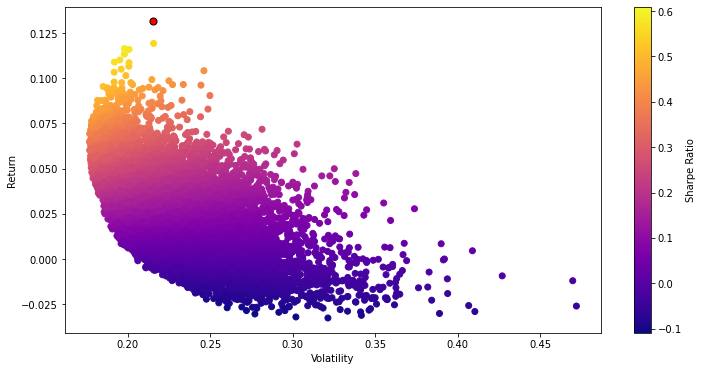

In [159]:
plt.figure(figsize=(12,6))
plt.scatter(vol_arr, ret_arr, c= sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.scatter(max_sr_vol, max_sr_ret, c='r', s = 50, edgecolors='black')

In [160]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights)*252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

In [161]:
from scipy.optimize import minimize

In [162]:
def neg_sharpe(weights):
    return get_ret_vol_sr(weights)[2]*(-1)

In [163]:
def check_sum(weights):
    # return 0 if the sum of weights is 1
    # else it returns how off you are from 1
    return np.sum(weights) - 1

In [164]:
cons = ({'type':'eq', 'fun':check_sum})

In [165]:
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1))

In [166]:
init_guess = [0.2,0.2,0.2,0.2,0.2]

In [167]:
opt_results = minimize(neg_sharpe, init_guess, method='SLSQP', bounds=bounds, constraints=cons)

In [168]:
opt_results

     fun: -0.6814962628661192
     jac: array([ 0.39131049, -0.        ,  0.07087763,  0.31614295,  0.12491148])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 4
    njev: 4
  status: 0
 success: True
       x: array([7.34187163e-17, 1.00000000e+00, 2.35922393e-16, 0.00000000e+00,
       0.00000000e+00])

In [169]:
opt_results.x

array([7.34187163e-17, 1.00000000e+00, 2.35922393e-16, 0.00000000e+00,
       0.00000000e+00])

In [170]:
get_ret_vol_sr(opt_results.x)

array([0.17044954, 0.25011075, 0.68149626])

In [171]:
# The efficient frontier is the set of optimal portfolios that offer the highest expected return 
# for a defined level of risk or the lowest risk for a given level of expected return. 
# Portfolios that lie below the efficient frontier are sub-optimal because 
# they do not provide enough return for the level of risk.

In [172]:
frontier_y = np.linspace(0,0.3,100)

In [173]:
def minimize_vol(weights):
    return get_ret_vol_sr(weights)[1]

In [174]:
frontier_volatility = []

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_vol, init_guess, method='SLSQP', bounds=bounds, constraints= cons)
    
    frontier_volatility.append(result['fun'])

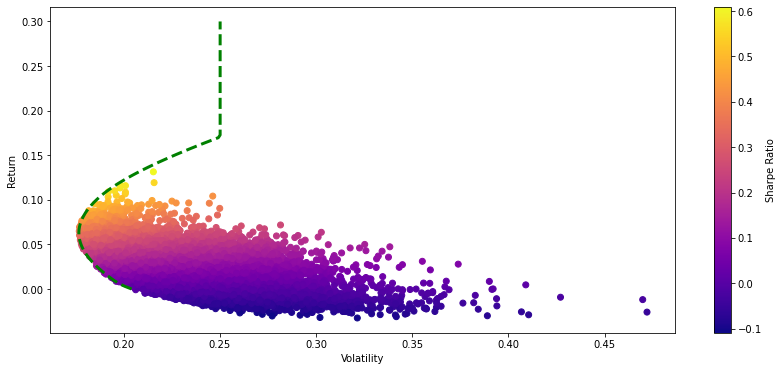

In [175]:
plt.figure(figsize = (14,6))
plt.scatter(vol_arr, ret_arr, c= sharpe_arr, cmap = 'plasma')
plt.colorbar(label = 'Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

plt.plot(frontier_volatility, frontier_y, 'g--', lw = 3)